# Создание нейронной сети на Torch

In [44]:
import torch
import numpy as np
from IPython.display import Image, display

## Нейрон

<img src="img/neuron.png" width=300, heigth=300>

In [45]:
# Создание класса нейрон. weights - веса связей, bias - порог, input - вектор сигналов, подающихся на нейрон

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  
  def forward(self, input):
    return torch.dot(self.weights, input) + self.bias # dot - скалярное произведение векторов
  
inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])

weights = torch.tensor([0.2, 0.8, -0.5, 1.0])
bias = 2.0

neuron = Neuron(weights, bias)
neuron.forward(inputs)

tensor(4.8000)

## Слой

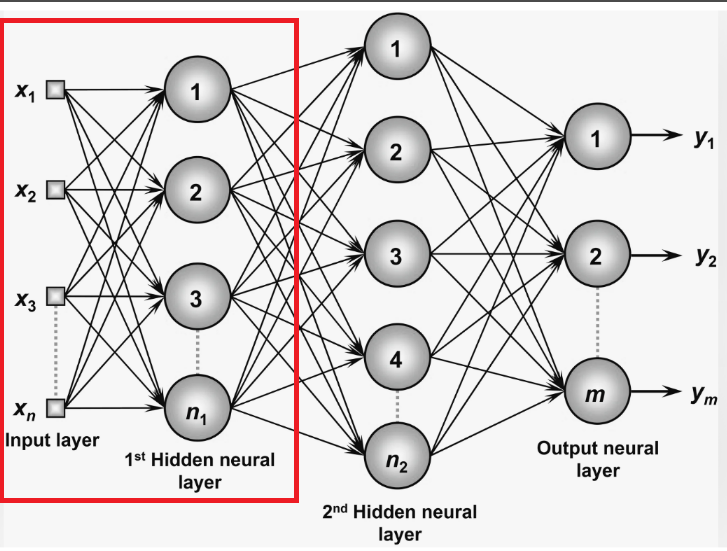

In [46]:
display(Image(filename="img/Layer.png", width=300, height=300))

In [47]:
class Layer:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
  
  def forward(self, input):
    return torch.mv(self.weights, input) + self.biases #mv - произведение вектора на матрицу
  
inputs = torch.tensor([1.0, 2.0, 3.0, 2.5])
weights = torch.tensor([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([2.0, 3.0, 0.5])

layer = Layer(weights, biases)
layer.forward(inputs)

tensor([4.8000, 1.2100, 2.3850])

## Слой (batch)
обработка партиями

In [48]:
class Layer:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
  
  def forward(self, inputs):
    return inputs @ self.weights.T + self.biases # провизведение матриц
  
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
weights1 = torch.tensor([[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])
biases1 = torch.tensor([2.0, 3.0, 0.5])

weights2 = torch.tensor([[.1, -.14, .5], [-.5, .12, -.33], [-.44, .73, -.13]])
biases2 = torch.tensor([-1, 2, -.5])

layer1 = Layer(weights1, biases1)
hidden_input = layer1.forward(inputs1)

layer2 = Layer(weights2, biases2)
output = layer2.forward(hidden_input)
output

tensor([[ 0.5031, -1.0419, -2.0388],
        [ 0.2434, -2.7332, -5.7633],
        [-0.9931,  1.4125, -0.3565]])

## Слой (случ. иниц)

In [49]:
class Layer:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons)
    self.biases = torch.zeros(n_neurons)
  
  def forward(self, inputs):
    return inputs @ self.weights + self.biases
  
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 6)
out = layer.forward(inputs1)
out

tensor([[ 3.6411,  8.3650, -0.1070,  1.8859,  7.0004, -6.2058],
        [ 0.5886, 12.5832, -3.0946, -1.3192, 11.1403, -5.9294],
        [ 7.1694,  8.5122, -2.6166,  0.7064,  6.6748, -8.4991]])

## Функции активации

<img src="img/Act.png" width=500, heigth=300>

Функция активации ReLU:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)
Функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

In [50]:
# RELU
class ReLU:
  def forward(self, inputs):
    return inputs.clip(min=0)    # заменить отрицательные числа нулями
  
ReLU().forward(out)

tensor([[ 3.6411,  8.3650,  0.0000,  1.8859,  7.0004,  0.0000],
        [ 0.5886, 12.5832,  0.0000,  0.0000, 11.1403,  0.0000],
        [ 7.1694,  8.5122,  0.0000,  0.7064,  6.6748,  0.0000]])

In [51]:
class Softmax:
  def forward(self, inputs):
    exp = torch.exp(inputs)
    probs = exp / exp.sum(dim=1, keepdim=True)
    return probs 
  
Softmax().forward(out)

tensor([[7.0137e-03, 7.8983e-01, 1.6527e-04, 1.2125e-03, 2.0178e-01, 3.7111e-07],
        [4.9968e-06, 8.0890e-01, 1.2563e-07, 7.4158e-07, 1.9109e-01, 7.3784e-09],
        [1.8377e-01, 7.0386e-01, 1.0335e-05, 2.8671e-04, 1.1207e-01, 2.8812e-08]])

## Функции потерь

Функция потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)
Функция потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">


In [52]:
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 1)
out = layer.forward(inputs1)
out

tensor([[-0.5199],
        [-4.3513],
        [-0.6153]])

In [53]:
# Среднеквадратичная ошибка
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean(torch.pow(out - y_true, 2))
  
y_true = torch.tensor([2, 3, 4]).view(-1, 1)
MSELoss().forward(out, y_true)

tensor(27.2311)

In [54]:
# Кроссэнтропия
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    correct_conf = y_pred.gather(dim=1, index=y_true.view(-1, 1))
    neglog = -torch.log(correct_conf)
    return torch.mean(neglog)
  
inputs1 = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])
layer = Layer(4, 3)
out = layer.forward(inputs1)
out = Softmax().forward(out)
out

tensor([[2.9334e-07, 3.1522e-01, 6.8478e-01],
        [4.7532e-11, 9.9969e-01, 3.1131e-04],
        [1.6509e-05, 1.2506e-02, 9.8748e-01]])

In [55]:
y_true = torch.tensor([1, 0, 0])
CategoricalCrossentropyLoss().forward(out, y_true)

tensor(11.9786)

## Оптимизация SGD (стохастический градиентный спуск)

#### Модифицируем класс Neuron
    Сделаем так, чтобы веса нейрона инициализировались из стандартного нормального распределения:

In [56]:
# Сформируем случайную задачу регркессии
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

Граф вычислений для решения задачи:

<img src="img/back.png" width=700, heigth=700>

In [57]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)
  
  def forward(self, input):
    self.input = input
    return torch.dot(self.weights, input) + self.bias

  def backward(self, dvalue):
    self.dweights = dvalue * self.input
    self.dinput = dvalue * self.weights
    self.dbias = dvalue


class Loss:    #класс вычисления ошибок
  def forward(self, y_pred, y_true):
    return (y_pred - y_true) ** 2

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true)

neuron = Neuron(4)
loss = Loss()

lr = 0.1

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    y_pred = neuron.forward(x_example)
    l = loss.forward(y_pred, y_example)
    losses.append(l)

    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbias
    
neuron.weights, neuron.bias  

(tensor([31.5778, 12.8614, 79.1451, 73.5438]), tensor([0.5000]))

#### Используем пакетный градиентный спуск (batch SGD + neuron)

In [58]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs, requires_grad=False)
    self.bias = torch.tensor(0.0, requires_grad=False)
  
  def forward(self, inputs):
    self.inputs = inputs
    return X @ self.weights.T + self.bias

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T.mv(dvalues)
      self.dbiases = dvalues.sum()


class MSELossNeuron:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    with torch.no_grad():
      self.dinputs = 2 * (y_pred - y_true) / len(y_pred)

Вычисления для решения задачи:

<img src="img/back1.png" width=700, heigth=700>

_

<img src="img/back2.png" width=700, heigth=700>

In [59]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

neuron = Neuron(4)
loss = MSELossNeuron()

lr = 0.1

for epoch in range(100):
    y_pred = neuron.forward(X)
    l = loss.forward(y_pred, y)
    loss.backward(y_pred, y)
    neuron.backward(loss.dinputs)

    neuron.weights -= lr * neuron.dweights
    neuron.bias -= lr * neuron.dbiases
print(f'epoch {epoch} mean loss {l.mean()}')

epoch 99 mean loss 5.350183629460048e-10


In [60]:
neuron.weights, coef

(tensor([89.2589, 99.6085, 13.4117, 84.2688]),
 array([89.25893404, 99.60848047, 13.41170353, 84.26875905]))

### Разные варианты веализации рейросети

In [61]:
class Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = torch.randn(n_inputs, n_neurons, requires_grad=False)
    self.biases = torch.zeros(n_neurons, requires_grad=False)
  
  def forward(self, inputs):
    self.inputs = inputs
    self.output = self.inputs @ self.weights + self.biases
    return self.output

  def backward(self, dvalues):
    with torch.no_grad():
      self.dweights = self.inputs.T @ dvalues
      self.dbiases = torch.sum(dvalues, dim=0)
      self.dinputs = dvalues @ self.weights.T

class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()
      self.dinputs[self.inputs <= 0] = 0

class Activation_Linear:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs

  def backward(self, dvalues):
    with torch.no_grad():
      self.dinputs = dvalues.clone()

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = sample_losses.mean()
    return data_loss

class MSELoss(Loss):
  def forward(self, y_pred, y_true):
    sample_losses = torch.mean((y_true - y_pred) ** 2, dim=1)
    return sample_losses

  def backward(self, dvalues, y_true):
    with torch.no_grad():
      self.dinputs = -2 * (y_true - dvalues) / len(dvalues)


In [62]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [63]:
fc1 = Dense(4, 1)
loss = MSELoss()
lr = 0.1

for epoch in range(100):
  out = fc1.forward(X)
  data_loss = loss.calculate(out, y.view(-1, 1))
  print(f'epoch {epoch} mean loss {data_loss}')
  loss.backward(out, y.view(-1, 1))
  fc1.backward(loss.dinputs)

  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

epoch 0 mean loss 18834.82421875
epoch 1 mean loss 10187.1494140625
epoch 2 mean loss 5708.87060546875
epoch 3 mean loss 3323.465576171875
epoch 4 mean loss 2009.801513671875
epoch 5 mean loss 1259.1044921875
epoch 6 mean loss 813.3945922851562
epoch 7 mean loss 538.8502197265625
epoch 8 mean loss 364.06671142578125
epoch 9 mean loss 249.65689086914062
epoch 10 mean loss 173.0816650390625
epoch 11 mean loss 120.94605255126953
epoch 12 mean loss 84.9949722290039
epoch 13 mean loss 59.97248840332031
epoch 14 mean loss 42.43935012817383
epoch 15 mean loss 30.094514846801758
epoch 16 mean loss 21.372777938842773
epoch 17 mean loss 15.195457458496094
epoch 18 mean loss 10.812342643737793
epoch 19 mean loss 7.698291778564453
epoch 20 mean loss 5.483705043792725
epoch 21 mean loss 3.9076125621795654
epoch 22 mean loss 2.785295009613037
epoch 23 mean loss 1.9857975244522095
epoch 24 mean loss 1.416037917137146
epoch 25 mean loss 1.0099174976348877
epoch 26 mean loss 0.7203536033630371
epoch 27

In [64]:
fc1.weights, coef

(tensor([[89.7931],
         [31.7879],
         [50.1545],
         [64.3512]]),
 array([89.79309854, 31.78786097, 50.15445892, 64.3511675 ]))

In [65]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32).view(-1, 1)

In [66]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [67]:
fc1 = Dense(1, 10)
relu1 = Activation_ReLU()
fc2 = Dense(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  out = fc1.forward(X)
  out = relu1.forward(out)
  out = fc2.forward(out)


  data_loss = loss.calculate(out, y)
  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(out)
  loss.backward(out, y)
  fc2.backward(loss.dinputs)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)

  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases 

epoch 0 mean loss 4.677402496337891
epoch 200 mean loss 0.009365900419652462
epoch 400 mean loss 0.006647384725511074
epoch 600 mean loss 0.005560564808547497
epoch 800 mean loss 0.005053402855992317
epoch 1000 mean loss 0.004761158488690853
epoch 1200 mean loss 0.004629584960639477
epoch 1400 mean loss 0.004589913412928581
epoch 1600 mean loss 0.0045763347297906876
epoch 1800 mean loss 0.004570800811052322
epoch 2000 mean loss 0.004568085074424744


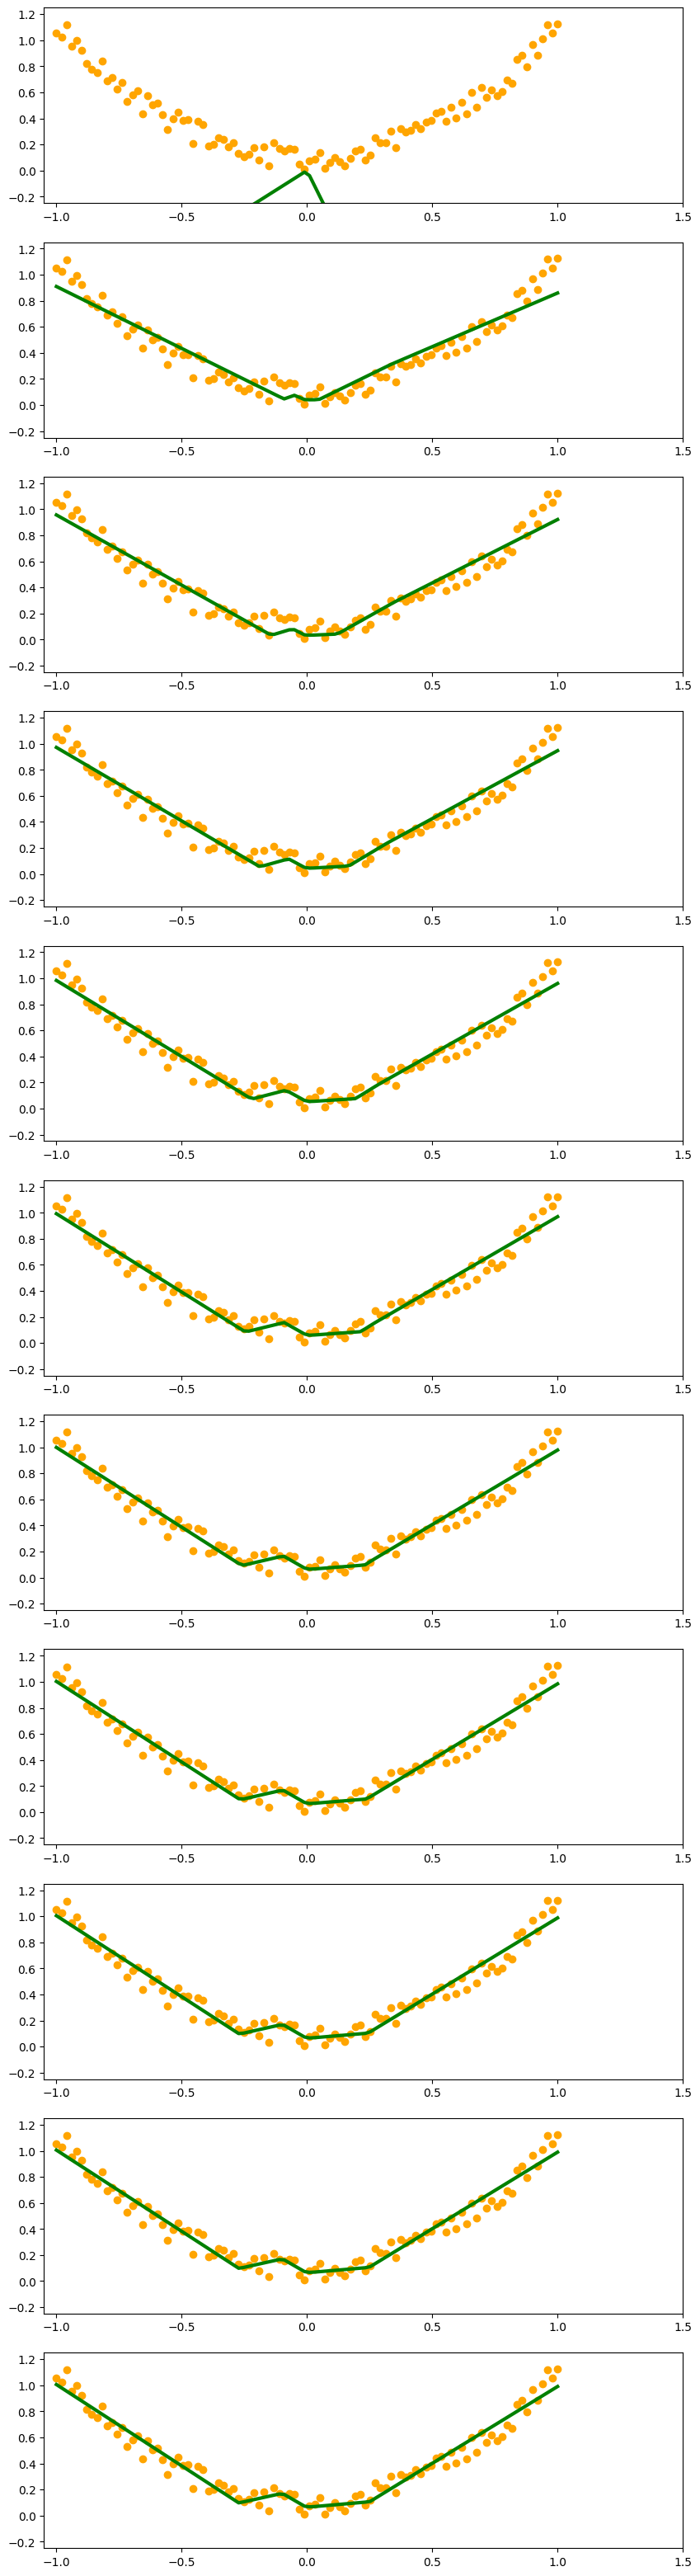

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)

Размер обучающей выборки: torch.Size([120, 4])
Размер тестовой выборки: torch.Size([30, 4])
Количество классов: 3

Начинаем обучение...
Эпоха 20/200, Loss: 0.4842, Test Accuracy: 0.7333
Эпоха 40/200, Loss: 0.1562, Test Accuracy: 0.9667
Эпоха 60/200, Loss: 0.0777, Test Accuracy: 0.9667
Эпоха 80/200, Loss: 0.0655, Test Accuracy: 1.0000
Эпоха 100/200, Loss: 0.0647, Test Accuracy: 0.9667
Эпоха 120/200, Loss: 0.0515, Test Accuracy: 0.9667
Эпоха 140/200, Loss: 0.0532, Test Accuracy: 0.9667
Эпоха 160/200, Loss: 0.0526, Test Accuracy: 0.9667
Эпоха 180/200, Loss: 0.0705, Test Accuracy: 0.9667
Эпоха 200/200, Loss: 0.0566, Test Accuracy: 1.0000

Финальная точность на тестовой выборке: 100.00%


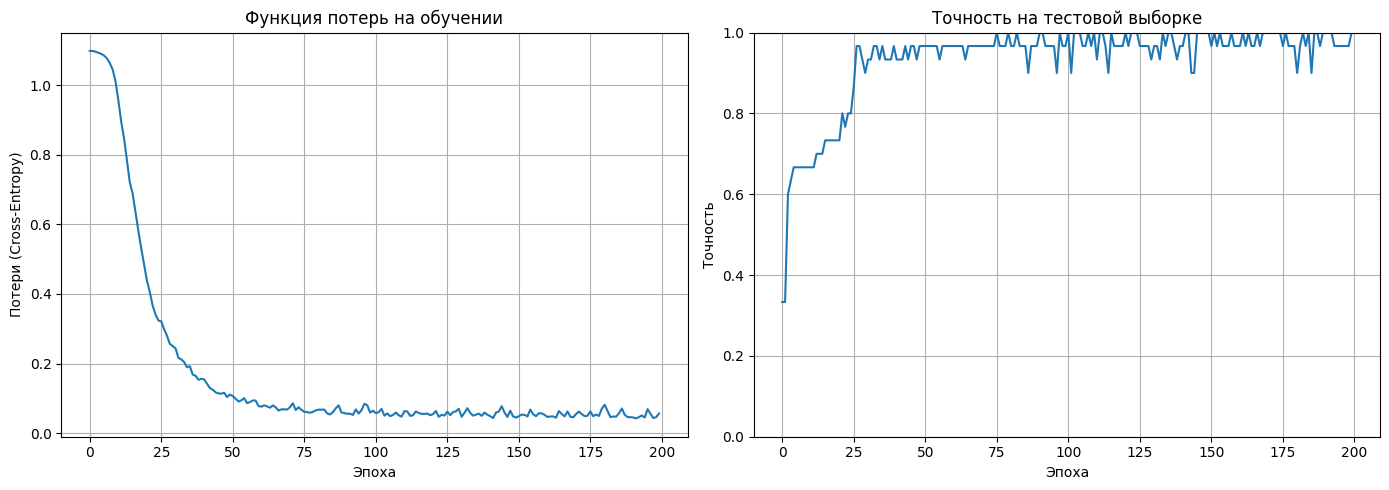


--- Детальный анализ ---
Названия классов: ['setosa' 'versicolor' 'virginica']

Матрица ошибок (строки - истинные классы, столбцы - предсказанные):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

--- Примеры предсказаний (первые 10 тестовых образцов) ---
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: virginica  | Предсказанный: virginica  | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: setosa     | Предсказанный: setosa     | ✓
Истинный: virginica  | Предсказанный: virginica  | ✓
Истинный: versicolor | Предсказанный: versicolor | ✓


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = torch.randn(n_inputs, n_neurons, requires_grad=False) * 0.1 
        self.biases = torch.zeros(n_neurons, requires_grad=False)
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = self.inputs @ self.weights + self.biases
        return self.output

    def backward(self, dvalues):
        with torch.no_grad():
            self.dweights = self.inputs.T @ dvalues
            self.dbiases = torch.sum(dvalues, dim=0)
            self.dinputs = dvalues @ self.weights.T

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output
    
    def backward(self, dvalues):
        with torch.no_grad():
            self.dinputs = dvalues.clone()
            self.dinputs[self.inputs <= 0] = 0

class Activation_Linear:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs

    def backward(self, dvalues):
        with torch.no_grad():
            self.dinputs = dvalues.clone()

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = sample_losses.mean()
        return data_loss

class CrossEntropyLoss(Loss):
    def forward(self, y_pred, y_true):
        exp = torch.exp(y_pred - torch.max(y_pred, dim=1, keepdim=True)[0])
        probs = exp / exp.sum(dim=1, keepdim=True)
        
        batch_size = len(y_true)
        self.probs = probs
        self.y_true = y_true
        correct_probs = probs[range(batch_size), y_true]
        return -torch.log(correct_probs + 1e-7)
    
    def backward(self, dvalues, y_true):
        with torch.no_grad():
            batch_size = len(y_true)
            self.dinputs = self.probs.clone()
            self.dinputs[range(batch_size), y_true] -= 1
            self.dinputs /= batch_size

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train).to(dtype=torch.float32)
X_test = torch.from_numpy(X_test).to(dtype=torch.float32)
y_train = torch.from_numpy(y_train).to(dtype=torch.long)
y_test = torch.from_numpy(y_test).to(dtype=torch.long)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Количество классов: {len(np.unique(y))}")

layer1 = Dense(4, 10)     
activation1 = Activation_ReLU()
layer2 = Dense(10, 8)    
activation2 = Activation_ReLU()
layer3 = Dense(8, 3)     
activation3 = Activation_Linear() 

loss_fn = CrossEntropyLoss()

learning_rate = 0.1
epochs = 200
batch_size = 16

train_losses = []
test_accuracies = []


print("\nНачинаем обучение...")
for epoch in range(epochs):
    
    epoch_loss = 0
    num_batches = 0
    
    indices = torch.randperm(len(X_train))
    
    for i in range(0, len(X_train), batch_size):
        batch_indices = indices[i:i+batch_size]
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        
        out = layer1.forward(X_batch)
        out = activation1.forward(out)
        out = layer2.forward(out)
        out = activation2.forward(out)
        out = layer3.forward(out)
        
        loss = loss_fn.calculate(out, y_batch)
        epoch_loss += loss.item()
        num_batches += 1
        
        loss_fn.backward(out, y_batch)
        activation3.backward(loss_fn.dinputs)
        layer3.backward(activation3.dinputs)
        activation2.backward(layer3.dinputs)
        layer2.backward(activation2.dinputs)
        activation1.backward(layer2.dinputs)
        layer1.backward(activation1.dinputs)
        
        with torch.no_grad():
            layer1.weights -= learning_rate * layer1.dweights
            layer1.biases -= learning_rate * layer1.dbiases
            layer2.weights -= learning_rate * layer2.dweights
            layer2.biases -= learning_rate * layer2.dbiases
            layer3.weights -= learning_rate * layer3.dweights
            layer3.biases -= learning_rate * layer3.dbiases
    
    avg_loss = epoch_loss / num_batches
    train_losses.append(avg_loss)
    
    with torch.no_grad():
        out = layer1.forward(X_test)
        out = activation1.forward(out)
        out = layer2.forward(out)
        out = activation2.forward(out)
        out = layer3.forward(out)
        
        predictions = torch.argmax(out, dim=1)
        
        accuracy = (predictions == y_test).float().mean().item()
        test_accuracies.append(accuracy)
    
    if (epoch + 1) % 20 == 0:
        print(f"Эпоха {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

print(f"\nФинальная точность на тестовой выборке: {accuracy*100:.2f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(train_losses)
ax1.set_xlabel('Эпоха')
ax1.set_ylabel('Потери (Cross-Entropy)')
ax1.set_title('Функция потерь на обучении')
ax1.grid(True)

ax2.plot(test_accuracies)
ax2.set_xlabel('Эпоха')
ax2.set_ylabel('Точность')
ax2.set_title('Точность на тестовой выборке')
ax2.grid(True)
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n--- Детальный анализ ---")
print(f"Названия классов: {iris.target_names}")

out = layer1.forward(X_test)
out = activation1.forward(out)
out = layer2.forward(out)
out = activation2.forward(out)
out = layer3.forward(out)
predictions = torch.argmax(out, dim=1)

confusion = torch.zeros(3, 3, dtype=torch.int32)
for i in range(len(y_test)):
    confusion[y_test[i], predictions[i]] += 1

print("\nМатрица ошибок (строки - истинные классы, столбцы - предсказанные):")
print(confusion.numpy())

print("\n--- Примеры предсказаний (первые 10 тестовых образцов) ---")
for i in range(min(10, len(X_test))):
    true_class = iris.target_names[y_test[i]]
    pred_class = iris.target_names[predictions[i]]
    correct = "✓" if y_test[i] == predictions[i] else "✗"
    print(f"Истинный: {true_class:10} | Предсказанный: {pred_class:10} | {correct}")